# MLP Classification: 2-D Fisher Iris Data

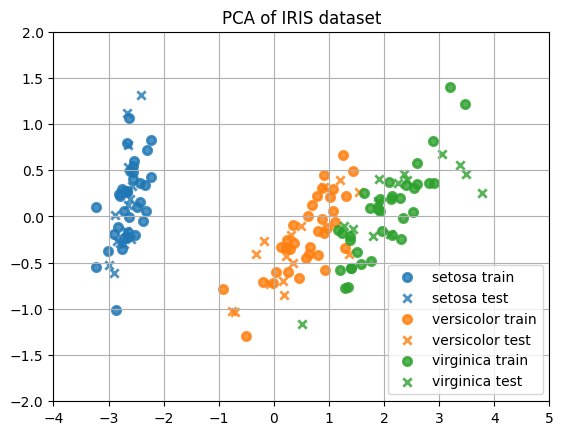

In [1]:
import numpy as np
from time import time
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from scipy.stats import randint, loguniform
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names

# Split into 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y)

# Reduce data to 2 principal components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train,y_train)
X_test_pca = pca.transform(X_test)
X_pca = np.vstack((X_train_pca,X_test_pca))

# Visualize the reduced training and test data
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], 
                color=color, alpha=0.8, lw=2, label=f"{target_name} train")
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], 
                color=color, alpha=0.8, lw=2, label=f"{target_name} test", marker='x')

plt.axis([-4, 5, -2, 2])
plt.legend(loc="best", shadow=False)
plt.title("PCA of IRIS dataset")
plt.grid()
plt.show()

RandomizedSearchCV took 56.84 seconds for 10 candidates parameter settings.
{'activation': 'relu', 'alpha': 0.23531225624140711, 'hidden_layer_sizes': 15, 'solver': 'adam'}
MLPClassifier(alpha=0.23531225624140711, hidden_layer_sizes=15, max_iter=5000)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



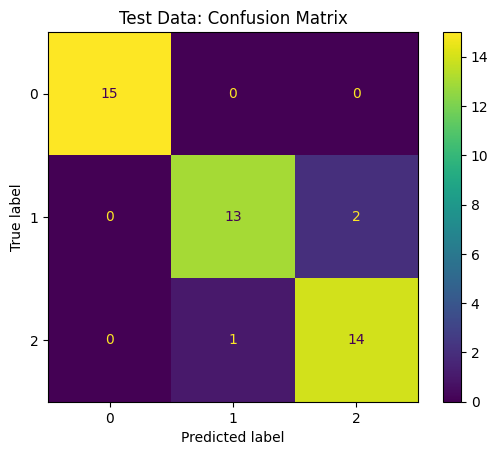

In [2]:
model_params = {'alpha': loguniform(1e-4, 10),
                'solver': ['sgd','adam','lbfgs'],
                'hidden_layer_sizes': randint(4,16),
                'activation': ['identity','logistic','tanh','relu']}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

n_iter = 10
random_search = RandomizedSearchCV(MLPClassifier(max_iter=5000), cv=cv,
                                   param_distributions=model_params, 
                                   n_iter=n_iter, verbose=0)

start = time()
random_search.fit(X_train_pca, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
        % ((time() - start), n_iter))

# Print best parameters after tuning
print(random_search.best_params_)
  
# Print how our model looks after hyper-parameter tuning
print(random_search.best_estimator_)

random_predictions = random_search.predict(X_test_pca)
  
# print classification report
print(classification_report(y_test, random_predictions))

cfm = confusion_matrix(y_test, random_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = np.arange(0,3))
cm_display.plot()
plt.title('Test Data: Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'MLP Classification')

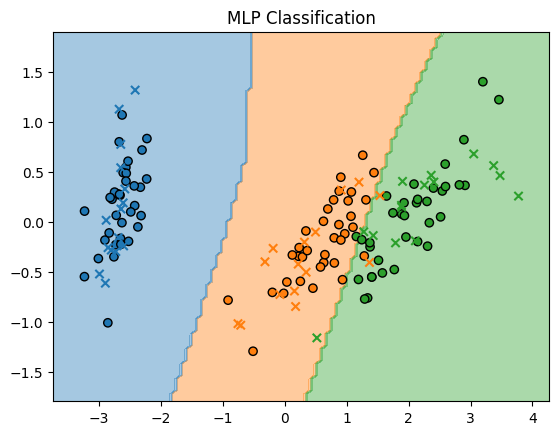

In [4]:
cm = ListedColormap(colors)
DecisionBoundaryDisplay.from_estimator(random_search.best_estimator_, X_pca, cmap=cm, alpha=0.4, eps=0.5)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=cm, edgecolors="k")
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cm, marker='x')
plt.title('MLP Classification')